In [2]:
import socket
import datetime
print ("My Laptop is : ",  socket.gethostname()    )
print ("Current Time : ",  datetime.datetime.now() )
print ("Temitope Adenuga")

My Laptop is :  MacBook-Pro.attlocal.net
Current Time :  2023-07-06 18:35:05.701197
Temitope Adenuga


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
# Loading the data
df = pd.read_csv("complaints.csv")
df.head()

/var/folders/c4/1cgj0pf52z52dqrl3n6sm6x80000gn/T/ipykernel_13737/2515790476.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30308.0,NaN,Other,Web,2023-04-27,In progress,Yes,NaN,6896105
1,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19145.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896026
2,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,19111.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896030
3,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,78725.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896035
4,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",NY,11233.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896060


The goal of this project is to have a better understanding of consumer complaints. AAnalyzing patterns and identify insights that would help increase consumer satisfaction.

EXPLORATORY DATA ANALYSIS

In [31]:
# Company response to consumer 
df['Company response to consumer'].value_counts()

Company response to consumer
Closed with explanation            2675819
Closed with non-monetary relief     602986
Closed with monetary relief         131403
In progress                         125555
Closed without relief                17868
Closed                               17611
Untimely response                     9402
Closed with relief                    5304
Name: count, dtype: int64

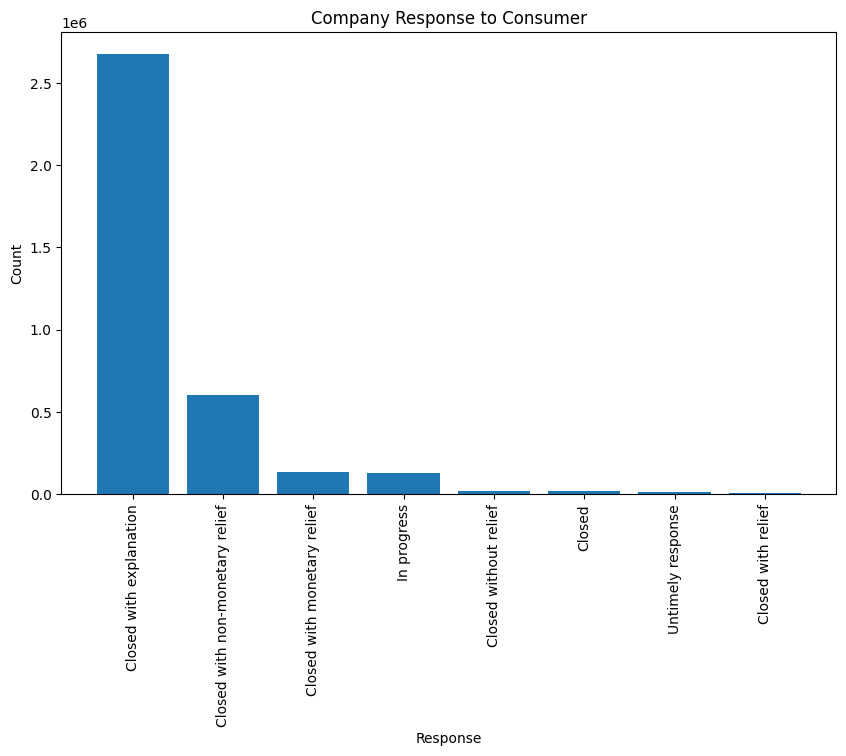

In [38]:
#Visualize the distribution of the responcse to consumer 
# Calculate value counts
value_counts = df['Company response to consumer'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)

# Set plot title and labels
plt.title("Company Response to Consumer")
plt.xlabel("Response")
plt.ylabel("Count")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

INSIGHTS

1. From the diagran above we can see that most cases were closed with an explanation. This is a sign that the company is actively looking at the cases being opened and providing feedback while closing them. 

2. The ratio of closed with non-monetary/monetary relief is healthy which means that most cases are closed with no payment from the company leading to more revenue. 

3. The ratio of late respenses is low, which means that most cases are closed on time. 


In [8]:
df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3585947,2016-07-12,Bank account or service,Checking account,"Account opening, closing, or management",NaN,"Hello, I opened a CitiGold checking account wi...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11211.0,NaN,Consent provided,Web,2016-07-12,Closed with monetary relief,Yes,No,2009169
3585948,2017-02-19,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,I am unable to access my credit report online ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,GA,30047.0,NaN,Consent provided,Web,2017-02-19,Closed with explanation,Yes,Yes,2351504
3585949,2017-04-26,Mortgage,FHA mortgage,Trouble during payment process,NaN,NaN,NaN,Selene Finance LP,NC,27379.0,NaN,Consent not provided,Web,2017-04-26,Closed with explanation,Yes,NaN,2467475
3585950,2017-02-07,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,OH,44820.0,NaN,Consent not provided,Web,2017-02-07,Closed with explanation,Yes,No,2333389
3585951,2018-03-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NY,10462.0,NaN,NaN,Fax,2018-03-19,Closed with explanation,Yes,NaN,2846995


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585952 entries, 0 to 3585951
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 492.

In [6]:
df.isnull()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
2,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
3,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
4,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585947,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
3585948,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3585949,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,True,False
3585950,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False


In [30]:
df.shape

(3585952, 18)

<Axes: title={'center': 'Company Response'}, ylabel='Company response to consumer'>

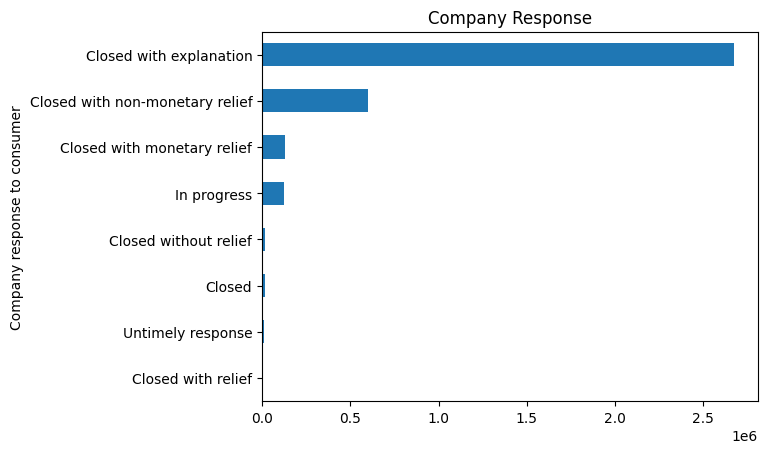

In [20]:
# Understanding the Distribution of Company Response 
df['Company response to consumer'].value_counts().sort_values(ascending=True).plot.barh(title='Company Response') 

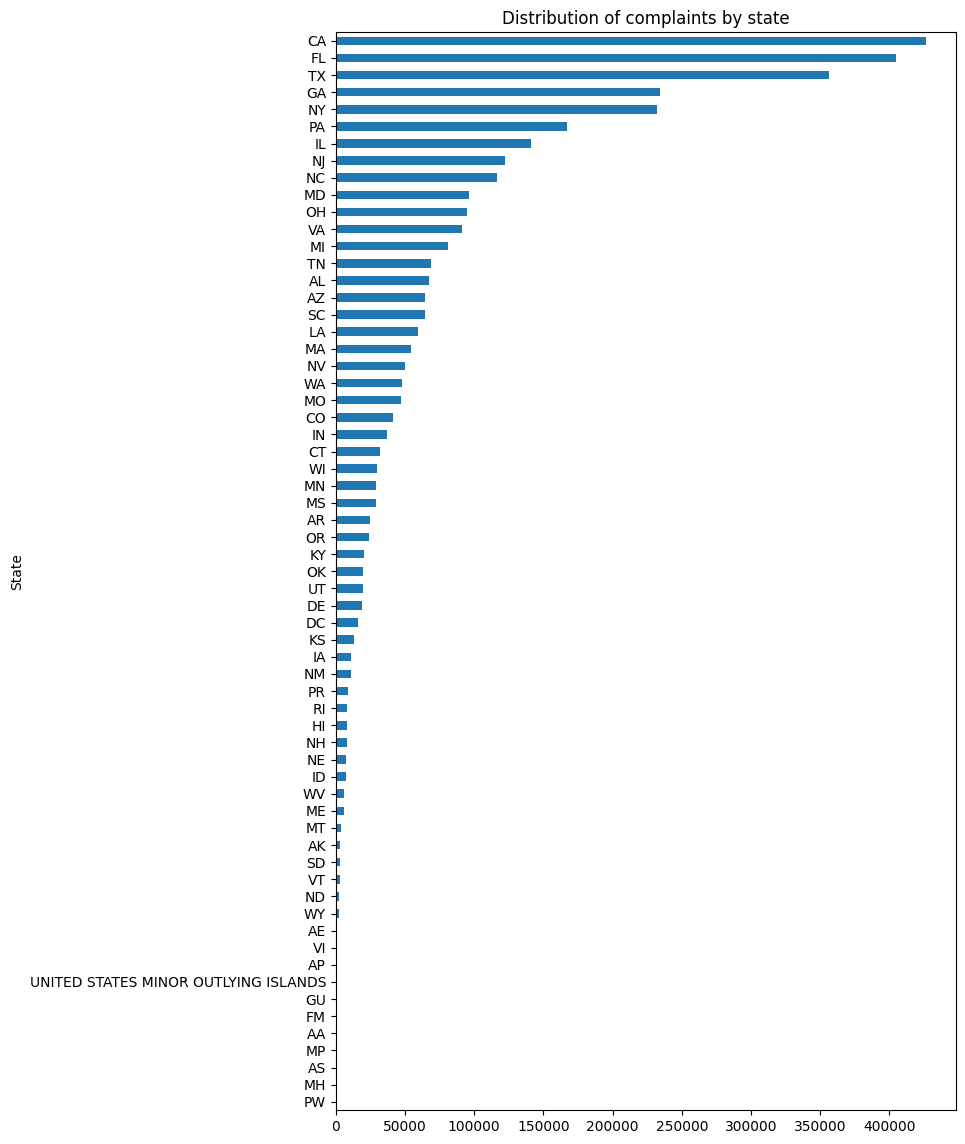

In [21]:
# Show the distribution of complaints by state 
plt.figure(figsize=(8, 14))  # Adjust the width and height as needed
df['State'].value_counts().sort_values(ascending=True).plot.barh(title='Distribution of complaints by state')
plt.show()

<Axes: title={'center': 'Complaints by product type'}, ylabel='Sub-product'>

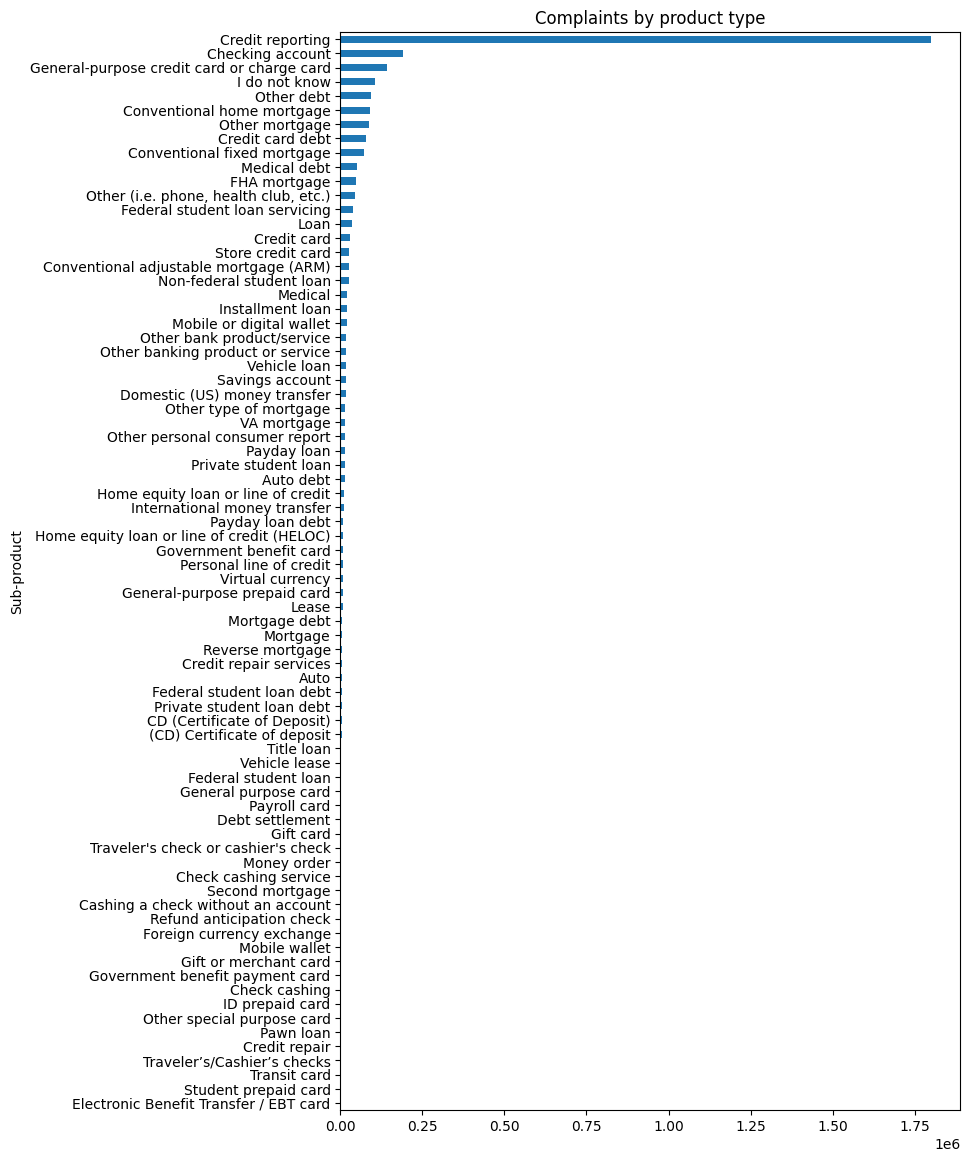

In [22]:
# Complaints by product type
plt.figure(figsize=(8, 14))  # Adjust the width and height as needed
df['Sub-product'].value_counts().sort_values(ascending=True).plot.barh(title='Complaints by product type') 

<Axes: title={'center': 'Timely response Yes or No'}, ylabel='Timely response?'>

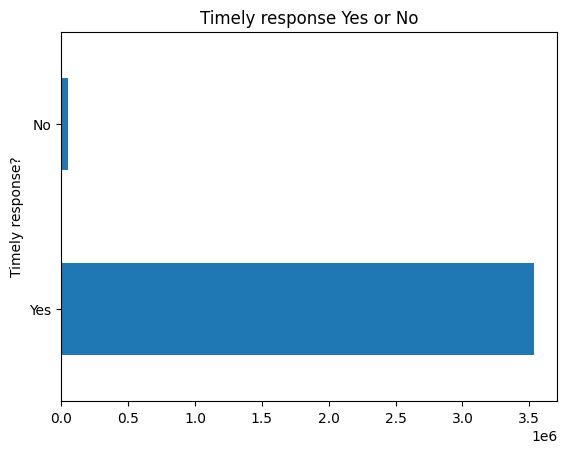

In [19]:
# Distribution of timely response 
df['Timely response?'].value_counts().plot.barh(title='Timely response Yes or No')

<Axes: title={'center': 'Product Distribution'}, ylabel='Product'>

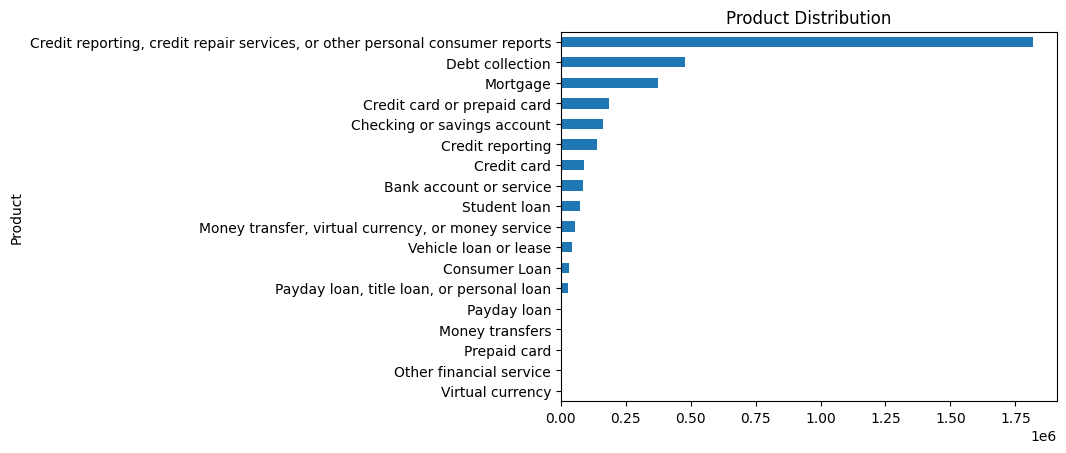

In [23]:
# Complaint distribution of whole dataset by product 
df['Product'].value_counts().sort_values(ascending=True).plot.barh(title='Product Distribution') 

In the figure above we see Credit reporting, credit repair services, or other personal consumer reports has the highest complaints. 

<Axes: title={'center': 'Product Distribution of non-Timely Response'}, ylabel='Product'>

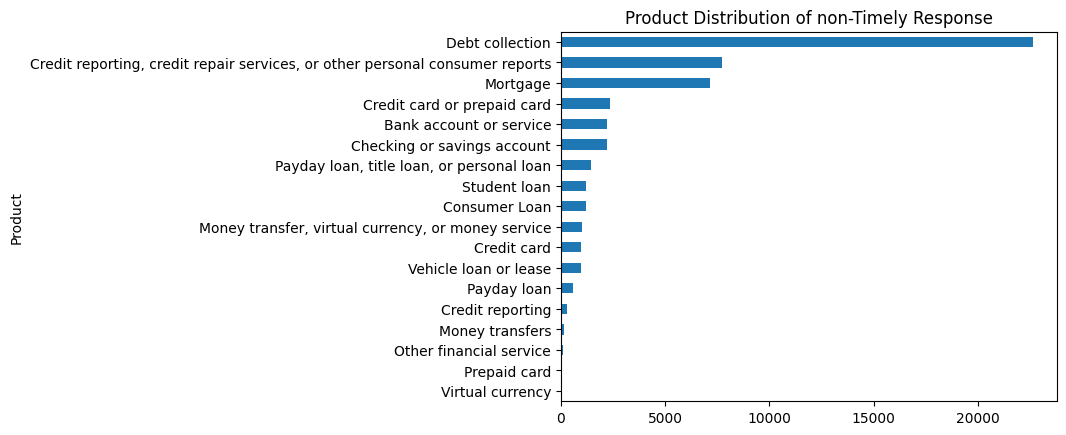

In [28]:
# Complaint distribution of only Timely Response=NO 
df[df['Timely response?'] == 'No']['Product'].value_counts().sort_values().plot.barh(title='Product Distribution of non-Timely Response')


In the figure above we see Debt collection has the highest complaints.

<Axes: title={'center': 'Product Distribution of Timely Response'}, ylabel='Product'>

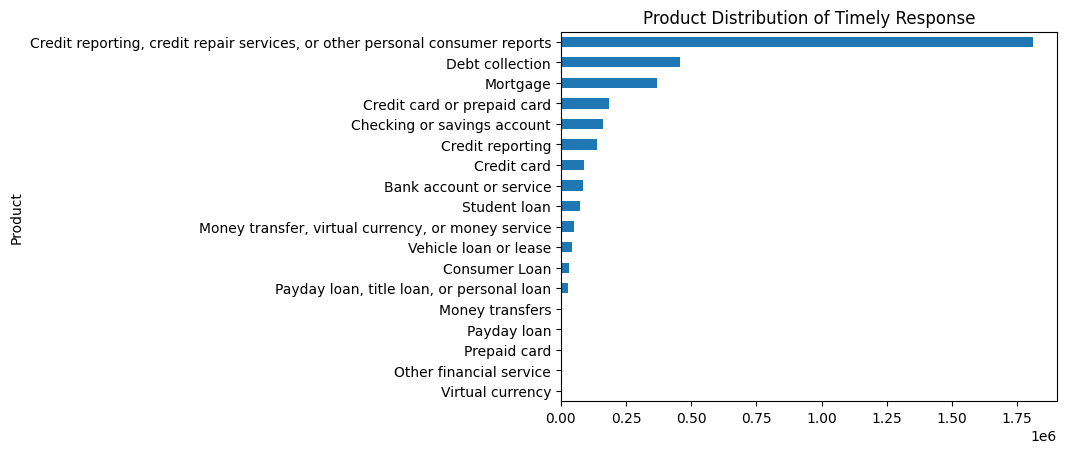

In [29]:
df[df['Timely response?'] == 'Yes']['Product'].value_counts().sort_values().plot.barh(title='Product Distribution of Timely Response')


In the figure above we see Credit reporting, credit repair services, or other personal consumer reports has the highest complaints. 